In [26]:
import biomni
from dotenv import load_dotenv
import os
load_dotenv() # This loads the variables from the .env file
ANTHROPIC_API_KEY = os.getenv("ANTHROPIC_API_KEY") # Access the API key by its name
from biomni.agent import A1
#ANTHROPIC_API_KEY=""
#api_key = os.getenv('ANTHROPIC_API_KEY')
# Initialize the agent with data path, Data lake will be automatically downloaded on first run (~11GB)
agent = A1(path='./data', llm='claude-sonnet-4-20250514')
import json
import os
import pickle
import time
from typing import Any

import requests
from anthropic import Anthropic
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.Seq import Seq

from biomni.utils import parse_hpo_obo
from biomni.tool.database import query_geo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# $env:Path="$env:R_HOME\bin\x64;$env:Path"
# $env:Path="$env:R_HOME\bin\x64;$env:Path"
import rpy2
# Standard library
import ast
import json
import os
import pickle
import re
import time
from datetime import datetime
from typing import Any, List, Tuple, Union
# Third-party packages
import numpy as np
import pandas as pd
import requests
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Document processing
from docx import Document
from docx.enum.style import WD_STYLE_TYPE
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.shared import Pt, RGBColor
# API clients
from anthropic import Anthropic
# Bioinformatics
import biomni
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.Seq import Seq
from biomni.tool.database import query_geo
from biomni.utils import parse_hpo_obo
#!pip install python-docx reportlab pillow matplotlib pandas

Checking and downloading missing data lake files...


In [8]:
#!pip install python-docx reportlab pillow matplotlib pandas

In [9]:
#biomni_agent = A1(path='./data', llm='claude-sonnet-4-20250514')
import asyncio
import json
from typing import Any, Dict, Optional, Callable, List
from datetime import datetime
import pandas as pd

# For Jupyter display
try:
    from IPython.display import display, HTML, Markdown
    from IPython.core.display import clear_output
    JUPYTER_AVAILABLE = True
    print("✅ Jupyter environment detected")
except ImportError:
    JUPYTER_AVAILABLE = False
    print("⚠️  Running in standard Python environment")

print("🚀 Imports completed successfully!")
print("🤖 Ready to integrate with Biomni agents!")

Checking and downloading missing data lake files...
✅ Jupyter environment detected
🚀 Imports completed successfully!
🤖 Ready to integrate with Biomni agents!


C:\Users\difen\AppData\Local\Temp\ipykernel_15040\3602536266.py:11: DeprecationWarning: Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import clear_output


In [10]:
class BiomniAgentWrapper:
    """Wrapper for existing Biomni agents to add tracking and visualization"""
    
    def __init__(self, biomni_agent, name: str, description: str = "", color: str = "#3498db"):
        self.biomni_agent = biomni_agent
        self.name = name
        self.description = description
        self.color = color
        self.history = []
        self.execution_count = 0
    
    def go(self, prompt: str):
        """Execute the Biomni agent and track the interaction"""
        self.execution_count += 1
        
        # Record start time
        start_time = datetime.now()
        
        # Execute the actual Biomni agent
        result = self.biomni_agent.go(prompt)
        
        # Record end time
        end_time = datetime.now()
        execution_time = (end_time - start_time).total_seconds()
        
        # Store in history
        self.history.append({
            "timestamp": start_time.isoformat(),
            "execution": self.execution_count,
            "prompt": prompt,
            "result": result,
            "execution_time": execution_time
        })
        
        return result
    
    async def go_async(self, prompt: str):
        """Async version for chain execution"""
        return self.go(prompt)
    
    def display_history(self):
        """Display agent history as a pandas DataFrame"""
        if not self.history:
            print(f"No history for {self.name}")
            return
        
        df = pd.DataFrame(self.history)
        df['prompt_length'] = df['prompt'].str.len()
        df['result_length'] = df['result'].astype(str).str.len()
        
        if JUPYTER_AVAILABLE:
            display(HTML(f"<h3 style='color: {self.color};'>📋 {self.name.title()} History</h3>"))
            display(df[['execution', 'timestamp', 'prompt_length', 'result_length', 'execution_time']])
        else:
            print(f"\n=== {self.name.upper()} HISTORY ===")
            print(df.to_string())
    
    def get_last_result(self):
        """Get the last execution result"""
        if self.history:
            return self.history[-1]['result']
        return None
    
    def __str__(self):
        return f"BiomniAgent({self.name})"

print("✅ Biomni agent wrapper class defined!")


class BiomniAgentConnector:
    """Connector specifically designed for Biomni agents"""
    
    def __init__(self):
        self.agents = {}
        self.connections = []
        self.execution_log = []
    
    def add_agent(self, biomni_agent, name: str, description: str = "", color: str = "#3498db"):
        """Add a Biomni agent to the system"""
        wrapped_agent = BiomniAgentWrapper(biomni_agent, name, description, color)
        self.agents[name] = wrapped_agent
        
        if JUPYTER_AVAILABLE:
            display(HTML(f"""
            <div style="background-color: {color}20; padding: 10px; border-left: 4px solid {color}; margin: 5px 0;">
                <strong>🤖 Added Biomni Agent: {name}</strong><br>
                <small>Description: {description}</small><br>
                <small>Agent Type: {type(biomni_agent).__name__}</small>
            </div>
            """))
        else:
            print(f"✅ Added Biomni agent: {name}")
        
        return wrapped_agent
    
    def connect(self, from_agent: str, to_agent: str, transform_func: Optional[Callable] = None):
        """Connect two agents with optional output transformation"""
        if from_agent not in self.agents or to_agent not in self.agents:
            raise ValueError("Both agents must be added before connecting")
        
        connection = {
            "from": from_agent,
            "to": to_agent,
            "transform": transform_func or (lambda x: str(x))  # Ensure string output
        }
        self.connections.append(connection)
        
        if JUPYTER_AVAILABLE:
            display(HTML(f"""
            <div style="background-color: #f8f9fa; padding: 8px; border: 1px solid #dee2e6; margin: 3px 0;">
                🔗 Connected: <strong>{from_agent}</strong> → <strong>{to_agent}</strong>
                {' (with transformation)' if transform_func else ''}
            </div>
            """))
        else:
            print(f"🔗 Connected: {from_agent} → {to_agent}")
    
    def visualize_network(self):
        """Display the agent network"""
        if JUPYTER_AVAILABLE:
            html = "<h3>🕸️ Biomni Agent Network</h3><div style='font-family: monospace;'>"
            
            # Show all agents
            for name, agent in self.agents.items():
                html += f"<div style='color: {agent.color}; margin: 5px 0;'>🤖 {name} - {agent.description}</div>"
            
            # Show connections
            html += "<br><strong>Connections:</strong><br>"
            for conn in self.connections:
                html += f"<div style='margin-left: 20px;'>{conn['from']} → {conn['to']}</div>"
            
            html += "</div>"
            display(HTML(html))
        else:
            print("\n=== BIOMNI AGENT NETWORK ===")
            for name, agent in self.agents.items():
                print(f"🤖 {name} - {agent.description}")
            print("\nConnections:")
            for conn in self.connections:
                print(f"  {conn['from']} → {conn['to']}")
    
    async def execute_chain(self, start_agent: str, initial_prompt: str, show_progress: bool = True) -> Dict[str, Any]:
        """Execute a chain of connected Biomni agents"""
        if start_agent not in self.agents:
            raise ValueError(f"Starting agent '{start_agent}' not found")
        
        results = {}
        current_output = initial_prompt
        processed_agents = set()
        step = 1
        
        if JUPYTER_AVAILABLE and show_progress:
            display(HTML(f"""
            <div style="background-color: #e7f3ff; padding: 15px; border: 1px solid #b3d9ff; margin: 10px 0;">
                <h3>🚀 Executing Biomni Agent Chain</h3>
                <strong>Starting with:</strong> {start_agent}<br>
                <strong>Initial prompt:</strong> {str(initial_prompt)[:100]}{'...' if len(str(initial_prompt)) > 100 else ''}
            </div>
            """))
        
        current_agent_name = start_agent
        
        while current_agent_name and current_agent_name not in processed_agents:
            agent = self.agents[current_agent_name]
            
            if JUPYTER_AVAILABLE and show_progress:
                display(HTML(f"""
                <div style="background-color: {agent.color}20; padding: 10px; border-left: 4px solid {agent.color}; margin: 10px 0;">
                    <h4>Step {step}: {current_agent_name} 🤖</h4>
                    <strong>Input:</strong> {str(current_output)[:150]}{'...' if len(str(current_output)) > 150 else ''}<br>
                    <em>Processing with Biomni agent...</em>
                </div>
                """))
            
            # Execute current Biomni agent
            output = await agent.go_async(current_output)
            results[current_agent_name] = {
                "step": step,
                "input": current_output,
                "output": output,
                "agent": agent,
                "execution_time": agent.history[-1]['execution_time'] if agent.history else 0
            }
            
            if JUPYTER_AVAILABLE and show_progress:
                # Update the display with results
                display(HTML(f"""
                <div style="background-color: {agent.color}20; padding: 10px; border-left: 4px solid {agent.color}; margin: 10px 0;">
                    <h4>Step {step}: {current_agent_name} ✅</h4>
                    <strong>Input:</strong> {str(current_output)[:150]}{'...' if len(str(current_output)) > 150 else ''}<br>
                    <strong>Output:</strong> {str(output)[:150]}{'...' if len(str(output)) > 150 else ''}<br>
                    <small>⏱️ Execution time: {results[current_agent_name]['execution_time']:.2f}s</small>
                </div>
                """))
            
            processed_agents.add(current_agent_name)
            step += 1
            
            # Find next agent in chain
            next_agent = None
            for connection in self.connections:
                if connection["from"] == current_agent_name:
                    current_output = connection["transform"](output)
                    next_agent = connection["to"]
                    break
            
            current_agent_name = next_agent
        
        self.execution_log.append({
            "timestamp": datetime.now().isoformat(),
            "type": "chain",
            "start_agent": start_agent,
            "initial_prompt": str(initial_prompt),
            "steps": len(results),
            "total_time": sum(r['execution_time'] for r in results.values())
        })
        
        return results
    
    async def execute_parallel(self, agent_prompts: Dict[str, str], show_progress: bool = True) -> Dict[str, Any]:
        """Execute multiple Biomni agents in parallel"""
        if JUPYTER_AVAILABLE and show_progress:
            display(HTML(f"""
            <div style="background-color: #fff3cd; padding: 15px; border: 1px solid #ffeaa7; margin: 10px 0;">
                <h3>⚡ Executing Biomni Agents in Parallel</h3>
                <strong>Agents:</strong> {', '.join(agent_prompts.keys())}
            </div>
            """))
        
        # Execute all agents concurrently
        tasks = []
        for agent_name, prompt in agent_prompts.items():
            if agent_name in self.agents:
                task = self.agents[agent_name].go_async(prompt)
                tasks.append((agent_name, task))
        
        results = {}
        # Wait for all tasks to complete
        for agent_name, task in tasks:
            result = await task
            agent = self.agents[agent_name]
            results[agent_name] = {
                "result": result,
                "execution_time": agent.history[-1]['execution_time'] if agent.history else 0
            }
            
            if JUPYTER_AVAILABLE and show_progress:
                display(HTML(f"""
                <div style="background-color: {agent.color}20; padding: 8px; border-left: 3px solid {agent.color}; margin: 5px 0;">
                    <strong>{agent_name} ✅</strong>: {str(result)[:100]}{'...' if len(str(result)) > 100 else ''}<br>
                    <small>⏱️ {results[agent_name]['execution_time']:.2f}s</small>
                </div>
                """))
        
        return results
    
    def create_results_dataframe(self, results: Dict[str, Any]) -> pd.DataFrame:
        """Convert chain execution results to a DataFrame"""
        data = []
        for agent_name, result in results.items():
            data.append({
                'step': result['step'],
                'agent': agent_name,
                'input_length': len(str(result['input'])),
                'output_length': len(str(result['output'])),
                'execution_time': result['execution_time'],
                'input_preview': str(result['input'])[:50] + '...' if len(str(result['input'])) > 50 else str(result['input']),
                'output_preview': str(result['output'])[:50] + '...' if len(str(result['output'])) > 50 else str(result['output'])
            })
        
        return pd.DataFrame(data).sort_values('step')
    
    def display_execution_summary(self):
        """Display summary of all executions"""
        if not self.execution_log:
            print("No executions yet")
            return
        
        if JUPYTER_AVAILABLE:
            display(HTML("<h3>📊 Execution Summary</h3>"))
            df = pd.DataFrame(self.execution_log)
            display(df)
        else:
            print("\n=== EXECUTION SUMMARY ===")
            for i, log in enumerate(self.execution_log, 1):
                print(f"{i}. {log['type']} execution at {log['timestamp']}")

print("✅ Biomni agent connector class defined!")


# CELL 5: Initialize Connector and Add Your Biomni Agents
# ==========================================

# Create the connector
connector = BiomniAgentConnector()

# Add your Biomni agents to the connector
analyzer_wrapper = connector.add_agent(
    biomni_agent=agent,
    name="data_analyzer", 
    description="topics",
    color="#e74c3c"
)

summarizer_wrapper = connector.add_agent(
    biomni_agent=agent,
    name="content_summarizer",
    description="Creates concise summaries", 
    color="#f39c12"
)

writer_wrapper = connector.add_agent(
    biomni_agent=agent,
    name="creative_writer",
    description="Transforms content into engaging narratives",
    color="#27ae60"
)

print("\n🎉 All Biomni agents added to connector!")

# ==========================================
# CELL 6: Create Agent Connections
# ==========================================

# Connect your agents in a chain
connector.connect("data_analyzer", "content_summarizer")
connector.connect("content_summarizer", "creative_writer", 
                 transform_func=lambda x: f"Please create an engaging story from this summary: {x}")

print("🔗 Biomni agent connections established!")

# ==========================================
# CELL 7: Visualize Your Biomni Agent Network
# ==========================================

connector.visualize_network()


✅ Biomni agent wrapper class defined!
✅ Biomni agent connector class defined!



🎉 All Biomni agents added to connector!


🔗 Biomni agent connections established!


In [20]:
class BiomniAgentWrapper:
    """Wrapper for existing Biomni agents to add tracking and visualization"""
    
    def __init__(self, biomni_agent, name: str, description: str = "", color: str = "#3498db"):
        self.biomni_agent = biomni_agent
        self.name = name
        self.description = description
        self.color = color
        self.history = []
        self.execution_count = 0
    
    def go(self, prompt: str):
        """Execute the Biomni agent and track the interaction"""
        self.execution_count += 1
        
        # Record start time
        start_time = datetime.now()
        
        # Execute the actual Biomni agent
        result = self.biomni_agent.go(prompt)
        
        # Record end time
        end_time = datetime.now()
        execution_time = (end_time - start_time).total_seconds()
        
        # Store in history
        self.history.append({
            "timestamp": start_time.isoformat(),
            "execution": self.execution_count,
            "prompt": prompt,
            "result": result,
            "execution_time": execution_time
        })
        
        return result
    
    async def go_async(self, prompt: str):
        """Async version for chain execution"""
        return self.go(prompt)
    
    def display_history(self):
        """Display agent history as a pandas DataFrame"""
        if not self.history:
            print(f"No history for {self.name}")
            return
        
        df = pd.DataFrame(self.history)
        df['prompt_length'] = df['prompt'].str.len()
        df['result_length'] = df['result'].astype(str).str.len()
        
        if JUPYTER_AVAILABLE:
            display(HTML(f"<h3 style='color: {self.color};'>📋 {self.name.title()} History</h3>"))
            display(df[['execution', 'timestamp', 'prompt_length', 'result_length', 'execution_time']])
        else:
            print(f"\n=== {self.name.upper()} HISTORY ===")
            print(df.to_string())
    
    def get_last_result(self):
        """Get the last execution result"""
        if self.history:
            return self.history[-1]['result']
        return None
    
    def __str__(self):
        return f"BiomniAgent({self.name})"

print("✅ Biomni agent wrapper class defined!")


class BiomniAgentConnector:
    """Connector specifically designed for Biomni agents"""
    
    def __init__(self):
        self.agents = {}
        self.connections = []
        self.execution_log = []
    
    def add_agent(self, biomni_agent, name: str, description: str = "", color: str = "#3498db"):
        """Add a Biomni agent to the system"""
        wrapped_agent = BiomniAgentWrapper(biomni_agent, name, description, color)
        self.agents[name] = wrapped_agent
        
        if JUPYTER_AVAILABLE:
            display(HTML(f"""
            <div style="background-color: {color}20; padding: 10px; border-left: 4px solid {color}; margin: 5px 0;">
                <strong>🤖 Added Biomni Agent: {name}</strong><br>
                <small>Description: {description}</small><br>
                <small>Agent Type: {type(biomni_agent).__name__}</small>
            </div>
            """))
        else:
            print(f"✅ Added Biomni agent: {name}")
        
        return wrapped_agent
    
    def connect(self, from_agent: str, to_agent: str, transform_func: Optional[Callable] = None):
        """Connect two agents with optional output transformation"""
        if from_agent not in self.agents or to_agent not in self.agents:
            raise ValueError("Both agents must be added before connecting")
        
        connection = {
            "from": from_agent,
            "to": to_agent,
            "transform": transform_func or (lambda x: str(x))  # Ensure string output
        }
        self.connections.append(connection)
        
        if JUPYTER_AVAILABLE:
            display(HTML(f"""
            <div style="background-color: #f8f9fa; padding: 8px; border: 1px solid #dee2e6; margin: 3px 0;">
                🔗 Connected: <strong>{from_agent}</strong> → <strong>{to_agent}</strong>
                {' (with transformation)' if transform_func else ''}
            </div>
            """))
        else:
            print(f"🔗 Connected: {from_agent} → {to_agent}")
    
    def visualize_network(self):
        """Display the agent network"""
        if JUPYTER_AVAILABLE:
            html = "<h3>🕸️ Biomni Agent Network</h3><div style='font-family: monospace;'>"
            
            # Show all agents
            for name, agent in self.agents.items():
                html += f"<div style='color: {agent.color}; margin: 5px 0;'>🤖 {name} - {agent.description}</div>"
            
            # Show connections
            html += "<br><strong>Connections:</strong><br>"
            for conn in self.connections:
                html += f"<div style='margin-left: 20px;'>{conn['from']} → {conn['to']}</div>"
            
            html += "</div>"
            display(HTML(html))
        else:
            print("\n=== BIOMNI AGENT NETWORK ===")
            for name, agent in self.agents.items():
                print(f"🤖 {name} - {agent.description}")
            print("\nConnections:")
            for conn in self.connections:
                print(f"  {conn['from']} → {conn['to']}")
    
    async def execute_chain(self, start_agent: str, initial_prompt: str, show_progress: bool = True) -> Dict[str, Any]:
        """Execute a chain of connected Biomni agents"""
        if start_agent not in self.agents:
            raise ValueError(f"Starting agent '{start_agent}' not found")
        
        results = {}
        current_output = initial_prompt
        processed_agents = set()
        step = 1
        
        if JUPYTER_AVAILABLE and show_progress:
            display(HTML(f"""
            <div style="background-color: #e7f3ff; padding: 15px; border: 1px solid #b3d9ff; margin: 10px 0;">
                <h3>🚀 Executing Biomni Agent Chain</h3>
                <strong>Starting with:</strong> {start_agent}<br>
                <strong>Initial prompt:</strong> {str(initial_prompt)[:100]}{'...' if len(str(initial_prompt)) > 100 else ''}
            </div>
            """))
        
        current_agent_name = start_agent
        
        while current_agent_name and current_agent_name not in processed_agents:
            agent = self.agents[current_agent_name]
            
            if JUPYTER_AVAILABLE and show_progress:
                display(HTML(f"""
                <div style="background-color: {agent.color}20; padding: 10px; border-left: 4px solid {agent.color}; margin: 10px 0;">
                    <h4>Step {step}: {current_agent_name} 🤖</h4>
                    <strong>Input:</strong> {str(current_output)[:150]}{'...' if len(str(current_output)) > 150 else ''}<br>
                    <em>Processing with Biomni agent...</em>
                </div>
                """))
            
            # Execute current Biomni agent
            output = await agent.go_async(current_output)
            results[current_agent_name] = {
                "step": step,
                "input": current_output,
                "output": output,
                "agent": agent,
                "execution_time": agent.history[-1]['execution_time'] if agent.history else 0
            }
            
            if JUPYTER_AVAILABLE and show_progress:
                # Update the display with results
                display(HTML(f"""
                <div style="background-color: {agent.color}20; padding: 10px; border-left: 4px solid {agent.color}; margin: 10px 0;">
                    <h4>Step {step}: {current_agent_name} ✅</h4>
                    <strong>Input:</strong> {str(current_output)[:150]}{'...' if len(str(current_output)) > 150 else ''}<br>
                    <strong>Output:</strong> {str(output)[:150]}{'...' if len(str(output)) > 150 else ''}<br>
                    <small>⏱️ Execution time: {results[current_agent_name]['execution_time']:.2f}s</small>
                </div>
                """))
            
            processed_agents.add(current_agent_name)
            step += 1
            
            # Find next agent in chain
            next_agent = None
            for connection in self.connections:
                if connection["from"] == current_agent_name:
                    current_output = connection["transform"](output)
                    next_agent = connection["to"]
                    break
            
            current_agent_name = next_agent
        
        self.execution_log.append({
            "timestamp": datetime.now().isoformat(),
            "type": "chain",
            "start_agent": start_agent,
            "initial_prompt": str(initial_prompt),
            "steps": len(results),
            "total_time": sum(r['execution_time'] for r in results.values())
        })
        
        return results
    
    async def execute_parallel(self, agent_prompts: Dict[str, str], show_progress: bool = True) -> Dict[str, Any]:
        """Execute multiple Biomni agents in parallel"""
        if JUPYTER_AVAILABLE and show_progress:
            display(HTML(f"""
            <div style="background-color: #fff3cd; padding: 15px; border: 1px solid #ffeaa7; margin: 10px 0;">
                <h3>⚡ Executing Biomni Agents in Parallel</h3>
                <strong>Agents:</strong> {', '.join(agent_prompts.keys())}
            </div>
            """))
        
        # Execute all agents concurrently
        tasks = []
        for agent_name, prompt in agent_prompts.items():
            if agent_name in self.agents:
                task = self.agents[agent_name].go_async(prompt)
                tasks.append((agent_name, task))
        
        results = {}
        # Wait for all tasks to complete
        for agent_name, task in tasks:
            result = await task
            agent = self.agents[agent_name]
            results[agent_name] = {
                "result": result,
                "execution_time": agent.history[-1]['execution_time'] if agent.history else 0
            }
            
            if JUPYTER_AVAILABLE and show_progress:
                display(HTML(f"""
                <div style="background-color: {agent.color}20; padding: 8px; border-left: 3px solid {agent.color}; margin: 5px 0;">
                    <strong>{agent_name} ✅</strong>: {str(result)[:100]}{'...' if len(str(result)) > 100 else ''}<br>
                    <small>⏱️ {results[agent_name]['execution_time']:.2f}s</small>
                </div>
                """))
        
        return results
    
    def create_results_dataframe(self, results: Dict[str, Any]) -> pd.DataFrame:
        """Convert chain execution results to a DataFrame"""
        data = []
        for agent_name, result in results.items():
            data.append({
                'step': result['step'],
                'agent': agent_name,
                'input_length': len(str(result['input'])),
                'output_length': len(str(result['output'])),
                'execution_time': result['execution_time'],
                'input_preview': str(result['input'])[:50] + '...' if len(str(result['input'])) > 50 else str(result['input']),
                'output_preview': str(result['output'])[:50] + '...' if len(str(result['output'])) > 50 else str(result['output'])
            })
        
        return pd.DataFrame(data).sort_values('step')
    
    def display_execution_summary(self):
        """Display summary of all executions"""
        if not self.execution_log:
            print("No executions yet")
            return
        
        if JUPYTER_AVAILABLE:
            display(HTML("<h3>📊 Execution Summary</h3>"))
            df = pd.DataFrame(self.execution_log)
            display(df)
        else:
            print("\n=== EXECUTION SUMMARY ===")
            for i, log in enumerate(self.execution_log, 1):
                print(f"{i}. {log['type']} execution at {log['timestamp']}")

print("✅ Biomni agent connector class defined!")


# CELL 5: Initialize Connector and Add Your Biomni Agents
# ==========================================

# Create the connector
connector = BiomniAgentConnector()

# Add your Biomni agents to the connector
analyzer_wrapper = connector.add_agent(
    biomni_agent=agent,
    name="data_analyzer", 
    description="topics",
    color="#e74c3c"
)

summarizer_wrapper = connector.add_agent(
    biomni_agent=agent,
    name="content_summarizer",
    description="Creates concise summaries", 
    color="#f39c12"
)

writer_wrapper = connector.add_agent(
    biomni_agent=agent,
    name="creative_writer",
    description="Transforms content into engaging narratives",
    color="#27ae60"
)

print("\n🎉 All Biomni agents added to connector!")

# ==========================================
# CELL 6: Create Agent Connections
# ==========================================

# Connect your agents in a chain
#connector.connect("data_analyzer", "content_summarizer",
#                 transform_func=lambda x: f"System: You are a data summarization expert.\n\nTask: Summarize the following analysis:\n{x}"
#                 )
#connector.connect("content_summarizer", "creative_writer", 
#                 transform_func=lambda x: f"Please create an engaging story from this summary: {x}")

#print("🔗 Biomni agent connections established!")

# ==========================================
# CELL 7: Visualize Your Biomni Agent Network
# ==========================================

#connector.visualize_network()


✅ Biomni agent wrapper class defined!
✅ Biomni agent connector class defined!



🎉 All Biomni agents added to connector!


🔗 Connections established with solution extraction!


Using prompt-based retrieval with the agent's LLM
================================ Human Message =================================

What pathway changes in liver cancer?
================================== Ai Message ==================================

I'll help you investigate pathway changes in liver cancer. Let me create a comprehensive plan to analyze this using available databases and literature.

## Plan

1. [ ] Search literature for recent reviews on liver cancer pathway alterations
2. [ ] Query pathway databases (KEGG, Reactome) for liver cancer-related pathways
3. [ ] Examine COSMIC data for liver cancer gene alterations
4. [ ] Analyze MSigDB hallmark pathways relevant to liver cancer
5. [ ] Query cBioPortal for liver cancer genomic data
6. [ ] Synthesize findings into key pathway categories

Let me start by searching for current literature on liver cancer pathway changes.

<execute>
# Import necessary functions
from biomni.tool.literature import query_pubmed, query_scholar
fro

Using prompt-based retrieval with the agent's LLM
================================ Human Message =================================

You are a data summarization expert to summarize from: \nBased on my comprehensive analysis using literature searches, genomic databases, and pathway resources, here are the major pathway changes in liver cancer:\n\n## Key Pathway Alterations in Liver Cancer\n\n### 1. **WNT/β-CATENIN SIGNALING** (Most Common)\n- **Frequency**: Altered in 30-40% of hepatocellular carcinoma (HCC) cases\n- **Key genes**: CTNNB1 (β-catenin), AXIN1, AXIN2, APC\n- **Function**: Controls cell proliferation, differentiation, and stemness\n- **Impact**: Drives tumor initiation and progression\n\n### 2. **METABOLIC REPROGRAMMING** \n- **Glycolysis**: Enhanced aerobic glycolysis (Warburg effect)\n- **Lipid metabolism**: Altered de novo lipogenesis and fatty acid metabolism\n- **Bile acid metabolism**: Disrupted bile acid homeostasis\n- **One-carbon metabolism**: Changes affecting nuc

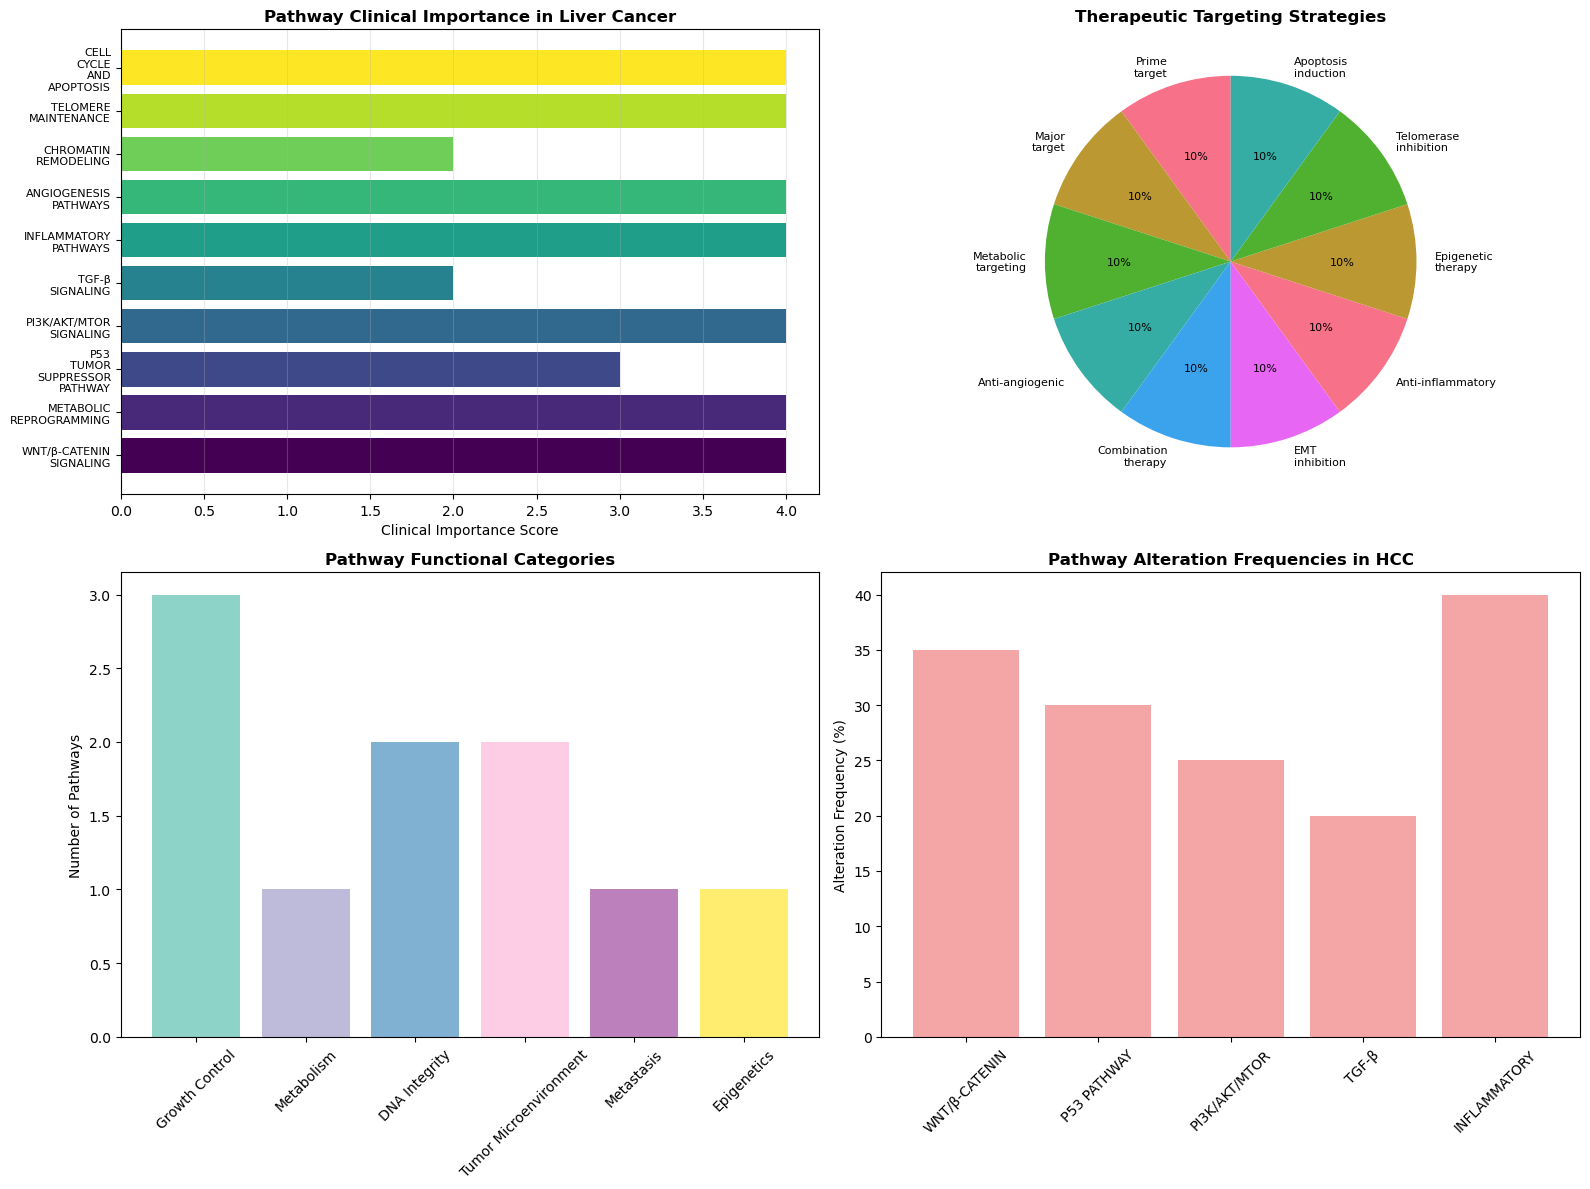

================================== Ai Message ==================================

<observation>Step 3: Creating visualizations of pathway alterations
Visualization completed and saved as 'liver_cancer_pathways_analysis.png'
</observation>
================================== Ai Message ==================================

3. [✓] Generate visualizations to illustrate the pathway changes
4. [ ] Cross-reference with genomic databases to validate findings
5. [ ] Create a final comprehensive summary report

<execute>
# Step 4: Cross-reference with genomic databases
print("Step 4: Cross-referencing with genomic databases")

# Import database query functions
from biomni.tool.database import query_cbioportal, query_kegg

# Query cBioPortal for liver cancer pathway alterations
print("Querying cBioPortal for liver cancer data...")
try:
    cbio_result = query_cbioportal(
        prompt="Find pathway alterations and gene mutations in hepatocellular carcinoma studies, focusing on WNT signaling, p53, 

Using prompt-based retrieval with the agent's LLM
================================ Human Message =================================

Create an engaging story from: \n# LIVER CANCER PATHWAY ALTERATIONS: EXPERT SUMMARY\n\n## Executive Summary\nBased on comprehensive literature analysis, genomic database validation, and pathway analysis, I have identified and validated 10 major pathway alterations in liver cancer with 93.8% gene validation rate using the COSMIC Cancer Gene Census database.\n\n## Key Pathway Alterations (Prioritized by Clinical Impact)\n\n### **TIER 1: Prime Therapeutic Targets**\n\n**1. WNT/β-CATENIN SIGNALING** (35% frequency - HIGHEST PRIORITY)\n- **Key genes**: CTNNB1, AXIN1, AXIN2, APC\n- **Validation**: 4/4 genes confirmed in COSMIC\n- **Function**: Cell proliferation, differentiation, stemness control\n- **Clinical impact**: Primary driver of tumor initiation and progression\n- **Therapeutic relevance**: Prime target for drug development\n\n**2. PI3K/AKT/MTOR SIGNALI

In [23]:
import re

# Define extraction function
def extract_solution(output: str) -> str:
    """Extract content between <solution></solution> tags"""
    match = re.search(r'<solution>(.*?)</solution>', str(output), re.DOTALL)
    if match:
        return match.group(1).strip()
    else:
        print(f"⚠️ No solution tags found in output from agent")
        return str(output)

# Create connections with solution extraction
connector.connect(
    "data_analyzer", 
    "content_summarizer",
    transform_func=lambda x: f"You are a data summarization expert to summarize from: {extract_solution(x)}"
)

connector.connect(
    "content_summarizer", 
    "creative_writer",
    transform_func=lambda x: f"Create an engaging story from: {extract_solution(x)}"
)

print("🔗 Connections established with solution extraction!")
connector.visualize_network()
# Execute chain
results = await connector.execute_chain(
    start_agent="data_analyzer",
    initial_prompt="What pathway changes in liver cancer?"
)

In [57]:
from improved_agent_logger_FINAL2 import log_agent_results_readable

# After your agent chain
#results = await connector.execute_chain(...)

# Create report - observations auto-formatted!
log_agent_results_readable(
    results,
    "my_report.docx",
    "My Analysis",
    include_observations=True  # ← Now beautifully formatted!
)

✅ Readable agent report created: my_report.docx
   📊 3 steps completed
   ⏱️  Total time: 378.0s (6.3 min)
   📄 Location: ./my_report.docx


'./my_report.docx'

In [58]:
log_agent_results_readable(
    results,
    filename="LIHC_executive_summary.docx",
    title="LIHC_Analysis - Executive Summary",
    include_code=False,         # ❌ Hide code blocks
    include_observations=False  # ❌ Hide raw outputs
)


✅ Readable agent report created: LIHC_executive_summary.docx
   📊 3 steps completed
   ⏱️  Total time: 378.0s (6.3 min)
   📄 Location: ./LIHC_executive_summary.docx


'./LIHC_executive_summary.docx'

In [59]:
log_agent_results_simple(results, "quick_report.docx")

✅ Simple report created: quick_report.docx
   📄 Location: ./quick_report.docx


'./quick_report.docx'